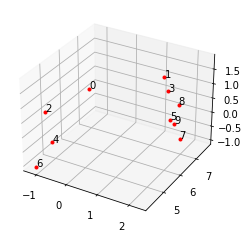

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from my_utils import read_data


def product_matrix(p1):
    x, y = p1
    return np.array([
        [0, -1, y],
        [1, 0, -x],
        [-y, x, 0]
    ])


def construct_A(product1, product2):
    return np.concatenate([product1[:2], product2[:2]])


def triangulate(ps1, ps2, P1, P2):
    points_3D = []
    for p1, p2 in zip(ps1, ps2):
        product1 = product_matrix(p1) @ P1
        product2 = product_matrix(p2) @ P2
        A = construct_A(product1, product2)
        _, _, V_t = np.linalg.svd(A)
        X = (V_t[3, :] / V_t[3, 3])
        points_3D.append(X[:3])
    return np.array(points_3D)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # define 3D subplot

points = read_data('data/epipolar/house_points.txt').reshape((-1, 4))
pt1 = np.array([[x, y] for x, y in zip(points[:, 0], points[:, 1])])
pt2 = np.array([[x, y] for x, y in zip(points[:, 2], points[:, 3])])

P1 = read_data('data/epipolar/house1_camera.txt').reshape((3, 4))
P2 = read_data('data/epipolar/house2_camera.txt').reshape((3, 4))

res = triangulate(pt1, pt2, P1, P2)  # calculate 3D coordinates

T = np.array([[-1, 0, 0], [0, 0, 1], [0, -1, 0]])  # transformation matrix
res = np.dot(res, T)

for i, pt in enumerate(res):
    plt.plot([pt[0]], [pt[1]], [pt[2]], 'r.')  # plot points
    ax.text(pt[0], pt[1], pt[2], str(i))  # plot indices

plt.show()